In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# seaborn is a package for the visualization of statistical data
import seaborn as sns
sns.set(style='ticks')

##Example of a hypothesis test

##Adopted Source: Haslwanter, T. (2106, p.108). An introduction to statistics with Python. Springer, Switzerland.

The average newborn weight in the USA is 3.5kg, with a standard deviation of 0.76kg. Is a baby with a weight of 2.6kg significantly different from the population?

H0: The baby comes from a healthy population (i.e., there is no difference between the baby and the population.

Step:

1. Find the distribution of the healthy babies *u* = 3.5 and sigma = .76.

2. Calculate the CDF of the newborn (value of interests). CDF(2.6). The probability that the bay is .9kg or lighter.


In [ ]:

from scipy import stats
nd = stats.norm(3.5, 0.76)

In [ ]:
nd.cdf(2.6)


0.11816486815719918

##Plots of Normality

QQ-Plots: The quantiles of a given data set

PP-Plots: The CDF of a given data set against the reference CDF

Probality Plots: Plot the ordered values of a given data set against the quintiles of the referenced distributions.

Text(0.5, 1.0, 'Shifted Normal Distribution')

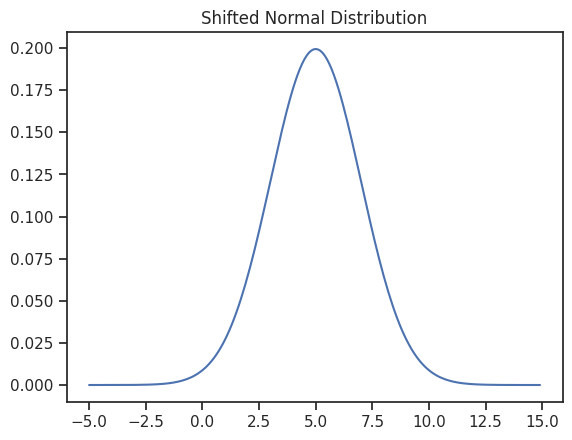

In [ ]:
'''PDF, scatter plot, and histogram.'''
# Generate the data
x = np.arange(-5,15,0.1)
# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.title('Shifted Normal Distribution')

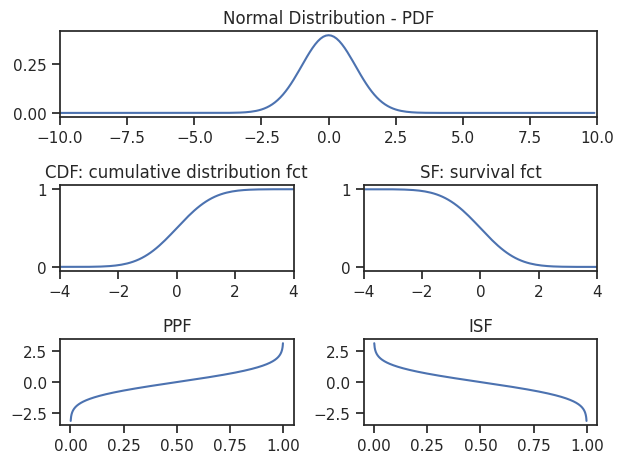

In [ ]:
''' Different aspects of a normal distribution'''
# Generate the data
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate

x2 = np.r_[0:1:0.001]

ax = plt.subplot2grid((3,2),(0,0), colspan=2)
plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')

plt.subplot(323)
plt.plot(x,rv.cdf(x))
plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF: survival fct')

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')
plt.tight_layout()
plt.show()

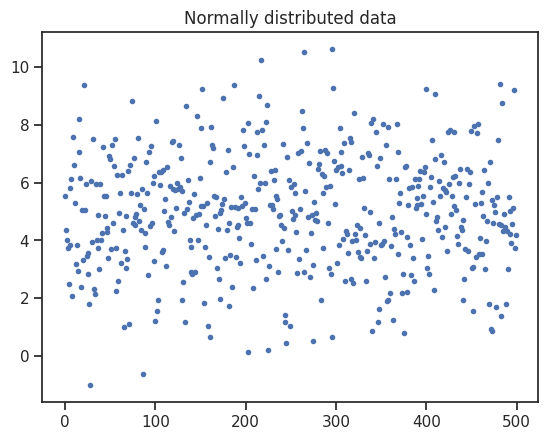

Text(0.5, 1.0, 'Histogram of normally distributed data')

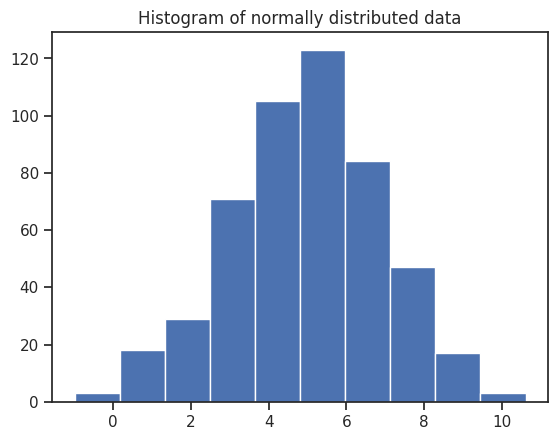

In [ ]:
numData = 500
data = stats.norm.rvs(myMean, mySD, size = numData)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')

(array([ 3.,  2., 18., 12., 19., 12., 23.,  4.,  6.,  1.]),
 array([ 0.13665063,  1.12688662,  2.1171226 ,  3.10735859,  4.09759457,
         5.08783056,  6.07806654,  7.06830253,  8.05853851,  9.0487745 ,
        10.03901048]),
 <BarContainer object of 10 artists>)

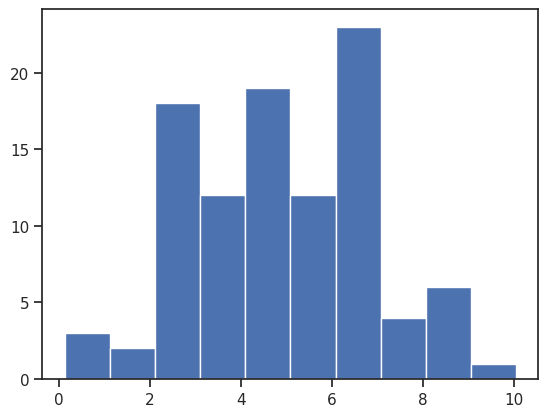

In [ ]:
'''Check if the distribution is normal.'''
# Generate and show a distribution
numData = 100
data = stats.norm.rvs(myMean, mySD, size=numData)
plt.hist(data)

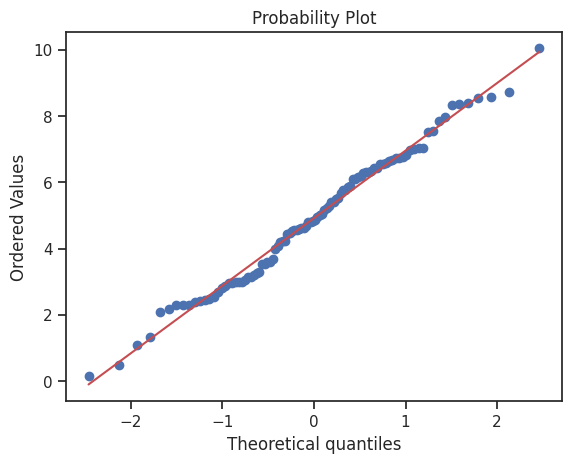

In [ ]:
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
_ = stats.probplot(data, plot=plt)

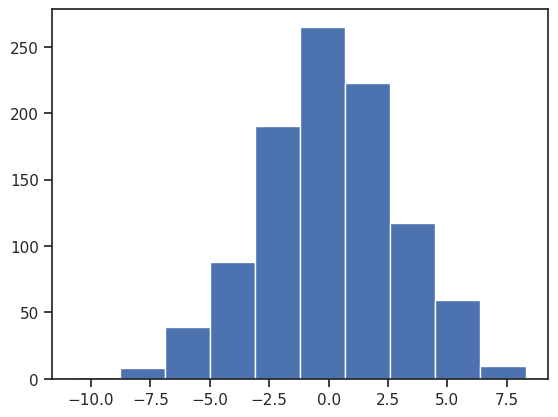

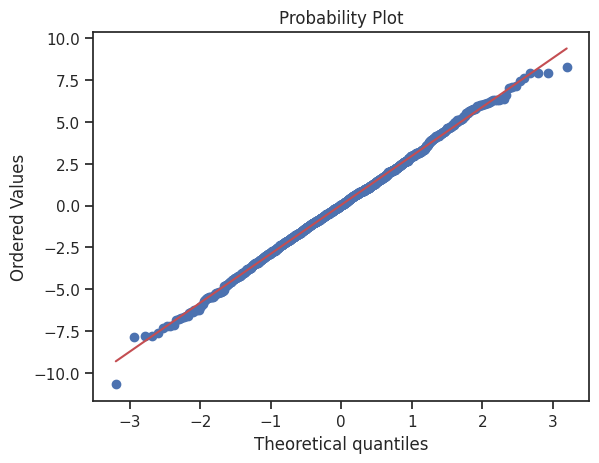

p-values for all 1000 data points: ----------------
Omnibus               0.913684
Shapiro-Wilk          0.556776
Lilliefors            0.671161
Kolmogorov-Smirnov    0.892921
dtype: float64
p-values for the first 100 data points: ----------------
Omnibus               0.656595
Shapiro-Wilk          0.920345
Lilliefors            0.300038
Kolmogorov-Smirnov    0.708685
dtype: float64
Data are normally distributed
Done!


In [ ]:
"""
Graphical and quantitative check, if a given distribution is normal.
- For small sample-numbers (<50), you should use the Shapiro-Wilk test or the
    "normaltest"
- for intermediate sample numbers, the Lilliefors-test is good since the
    original Kolmogorov-Smirnov-test is unreliable when mean and std of the
    distribution are not known.
- the Kolmogorov-Smirnov(Kolmogorov-Smirnov) test should only be used for
    large sample numbers (>300)
"""

# author: Thomas Haslwanter, date: Feb-2021

# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# additional packages
from statsmodels.stats.diagnostic import lilliefors
from typing import List


def generate_data(show_flag:bool=True) -> np.ndarray:
    """Generates input data for the function 'check_normality'

    Parameters
    show_flag : Controls the display of the generated data


    Returns
    -------
    data : vector with random data
    """

    # Set the parameters
    numData = 1000
    myMean = 0
    mySD = 3

    # To get reproducable values, I provide a seed value
    np.random.seed(1234)

    # Generate and show random data
    data = stats.norm.rvs(myMean, mySD, size=numData)

    if show_flag:
        plt.hist(data)
        plt.show()

    return data


def check_normality(data: np.ndarray, show_flag: bool=True) -> List[float]:
    """Check if the distribution is normal

    Parameters
    ----------
    data : vector of data to be tested
    show_flag : controls the display of data

    Returns
    -------
    ps : List of p-values for different normality tests
    """

    few_data = data[::10]

    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    if show_flag:
        _ = stats.probplot(data, plot=plt)
        plt.show()

    pVals = pd.Series()
    pFewVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['Omnibus']    = stats.normaltest(data)
    _, pFewVals['Omnibus'] = stats.normaltest(few_data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk']    = stats.shapiro(data)
    _, pFewVals['Shapiro-Wilk'] = stats.shapiro(few_data)

    # Or you can check for normality with Lilliefors-test
    _, pVals['Lilliefors']    = lilliefors(data)
    _, pFewVals['Lilliefors'] = lilliefors(few_data)

    # Alternatively with original Kolmogorov-Smirnov test
    _, pVals['Kolmogorov-Smirnov']    = \
            stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
    _, pFewVals['Kolmogorov-Smirnov'] = \
        stats.kstest((few_data-np.mean(few_data))/np.std(few_data,ddof=1), 'norm')

    print(f'p-values for all {len(data)} data points: ----------------')
    print(pVals)
    print('p-values for the first 100 data points: ----------------')
    print(pFewVals)

    if pVals['Omnibus'] > 0.05:
        print('Data are normally distributed')
    # --- >>> STOP stats <<< ---

    return pVals


if __name__ == '__main__':

    data = generate_data()
    ps = check_normality(data)
    input('Done!')



##Hypothesis Test: Concepts, Errors, p-Value, and Sample Size

Example: You are an instructor, and the target score for students on their final exam is 110. Your contract depends on thier score not being significantly differrent that the target.

Final exam scores: 109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.11.

In [ ]:
scores = np.array([[109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.11]])

##Hypothesis Test: Concepts, Errors, p-Value, and Sample Size

Example: You are an instructor, and the target score for studetsn on their final exam is 110. Your contract depends on thier score not being significantly differrent that the target.

Final exam scores: 109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.11.

In [ ]:
import numpy as np
scores = np.array([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.11])

In [ ]:
stats.normaltest(scores) #scores are normally distributed.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


NormaltestResult(statistic=0.47578029290229346, pvalue=0.7882892827127141)

In [ ]:
np.mean(scores)

97.121

In [ ]:
#differrence between the sample mean and the comparative score of 100
np.mean(scores) - 110

-12.879000000000005

In [ ]:
#using the t-distributions (a distribution that depednds on the ratio of the sample mean and the standard error)
tval = (110 - np.mean(scores))/stats.sem(scores)
tval

1.8360566316049283

In [ ]:
td = stats.t(len(scores)-1)
p= 2*td.sf(tval)
p  #the p value

0.0995334338161495